In [1]:
pip install scikit-learn pandas matplotlib

In [2]:
import pandas as pd

df = pd.read_csv('/content/Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


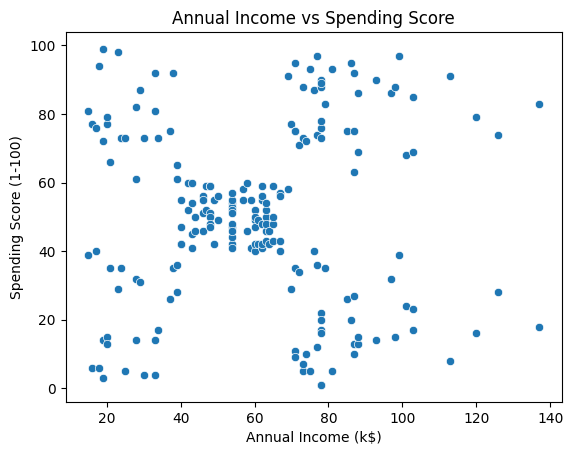

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Simple scatter plot
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs Spending Score')
plt.show()

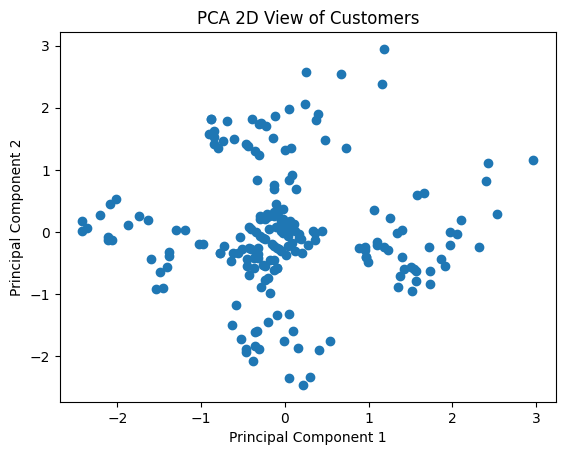

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize PCA result
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA 2D View of Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [5]:
from sklearn.cluster import KMeans

In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = y_kmeans

# Print first few cluster assignments
print(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())

   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        4
1                  15                      81        2
2                  16                       6        4
3                  16                      77        2
4                  17                      40        4


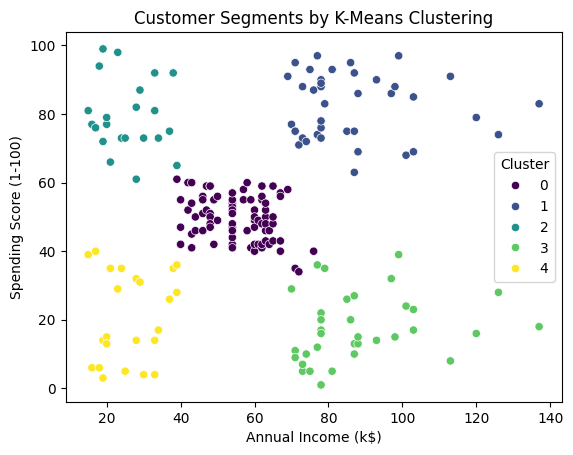

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments by K-Means Clustering')
plt.show()

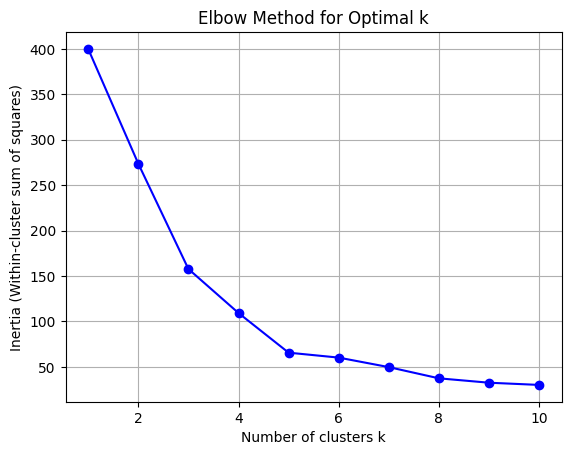

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare the features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

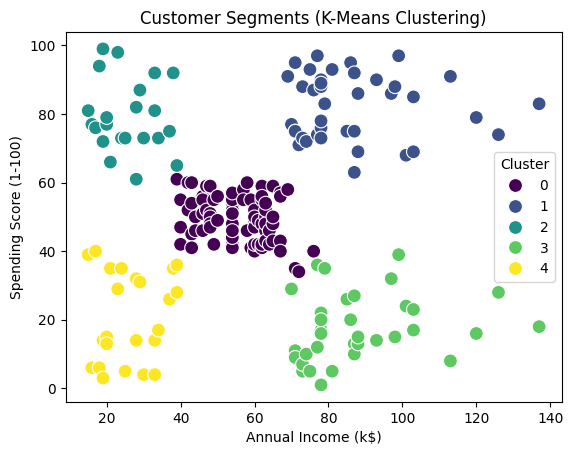

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of clusters
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',            # color by cluster label
    palette='viridis',        # color palette
    data=df,
    s=100                     # size of points
)

plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [12]:
from sklearn.metrics import silhouette_score

# Compute silhouette score
score = silhouette_score(X_scaled, df['Cluster'])

print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.5547
